# Import

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import undetected_chromedriver as uc
from selenium.webdriver.chrome.options import Options

import time
import re

from bs4 import BeautifulSoup

data_base_path = "C:\Potenup\Drug-Detection-Chatbot\data\\"

original_file_name = "단일 경구약제_5,000종 리스트.xlsx"
file_name = "single_drug_list_5000.csv"

In [6]:
# 보통 현재 작업 폴더(CWD)가 src 이므로 부모(프로젝트 루트)를 sys.path에 추가
import sys, os
from pathlib import Path

ROOT = Path.cwd().parent
if (ROOT / "utils").exists():
    sys.path.insert(0, str(ROOT))
else:
    # 혹시 구조가 더 깊을 때 대비
    ROOT2 = ROOT.parent
    if (ROOT2 / "utils").exists():
        sys.path.insert(0, str(ROOT2))

# 약 리스트 데이터 불러오기

In [ ]:
df_1 = pd.read_excel(data_base_path + original_file_name, sheet_name=0)

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   C-
Code       1000 non-null   object 
 1   구분            1000 non-null   object 
 2   제품명           1000 non-null   object 
 3   복지부 
분류코드     1000 non-null   float64
 4   Unnamed: 4    0 non-null      float64
 5   Unnamed: 5    0 non-null      float64
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Conncet
Code  5000 non-null   object 
 10  구분.1          5000 non-null   object 
 11  제품명.1         5000 non-null   object 
 12  복지부
분류코드      5000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 507.9+ KB


In [ ]:
df_2 = pd.read_excel(data_base_path + original_file_name, sheet_name=1)

In [6]:
df_2.head()

,C-\nCode,구분,제품명,복지부 \n분류코드,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Conncet\nCode,구분.1,제품명.1,복지부\n분류코드
0,K-000027,일반의약품,아네모정 20T,234.0,NaN,NaN,NaN,NaN,NaN,K-000032,전문의약품,다이크로짇정 25MG (유한),213
1,K-000030,전문의약품,테라싸이클린캅셀 250MG (종근당),615.0,NaN,NaN,NaN,NaN,NaN,K-000034,일반의약품,페니라민정,141
2,K-000041,일반의약품,삐콤정 (유한),316.0,NaN,NaN,NaN,NaN,NaN,K-000040,전문의약품,유한짓정 (유한),622
3,K-000042,일반의약품,푸라콩정,141.0,NaN,NaN,NaN,NaN,NaN,K-000043,전문의약품,디고신정 0.25MG(HK이노엔),211
4,K-000065,전문의약품,크로세린캅셀 250MG (동아),613.0,NaN,NaN,NaN,NaN,NaN,K-000117,일반의약품,액티피드정 (삼일),141


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   C-
Code       3999 non-null   object 
 1   구분            3999 non-null   object 
 2   제품명           3999 non-null   object 
 3   복지부 
분류코드     3999 non-null   float64
 4   Unnamed: 4    0 non-null      float64
 5   Unnamed: 5    0 non-null      float64
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Conncet
Code  5000 non-null   object 
 10  구분.1          5000 non-null   object 
 11  제품명.1         5000 non-null   object 
 12  복지부
분류코드      5000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 507.9+ KB


# 약 리스트 데이터 전처리

## 결측치 제거

In [ ]:
# 필요 없는 칼럼 제거
df_1 = df_1.drop(["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Conncet\nCode", "구분.1", "제품명.1", "복지부\n분류코드"], axis=1)

In [9]:
df_1.head()

,C-\nCode,구분,제품명,복지부 \n분류코드
0,K-000059,일반의약품,게루삼정 200T,234.0
1,K-000069,일반의약품,지엘타이밍정 12T,115.0
2,K-000080,전문의약품,마이암부톨제피정400mg,622.0
3,K-000112,일반의약품,아로나민골드,316.0
4,K-000114,전문의약품,셉트린정 480MG(삼일),621.0


In [10]:
df_1.shape

(5000, 4)

In [11]:
df_1 = df_1.dropna()

In [12]:
df_1.shape

(1000, 4)

In [13]:
df_2 = df_2.drop(["Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Conncet\nCode", "구분.1", "제품명.1", "복지부\n분류코드"], axis=1)

In [14]:
df_2.shape

(5000, 4)

In [15]:
df_2 = df_2.dropna()

In [16]:
df_2.shape

(3999, 4)

## 병합

In [ ]:
# sheet1 과 sheet2 를 병합
original_df = pd.concat([df_1, df_2], axis=0)

In [18]:
original_df

,C-\nCode,구분,제품명,복지부 \n분류코드
0,K-000059,일반의약품,게루삼정 200T,234.0
1,K-000069,일반의약품,지엘타이밍정 12T,115.0
2,K-000080,전문의약품,마이암부톨제피정400mg,622.0
3,K-000112,일반의약품,아로나민골드,316.0
4,K-000114,전문의약품,셉트린정 480MG(삼일),621.0
...,...,...,...,...
3994,K-051831,일반의약품,위엔싹에프정 10T,232.0
3995,K-052494,일반의약품,뉴락스에프정 10T,238.0
3996,K-052505,전문의약품,휴메트린정0.125mg,252.0
3997,K-053315,전문의약품,레코미드서방정 150MG(유한),232.0


In [ ]:
original_df.to_csv(data_base_path + file_name, index=False)

## 제품명 정제 (약명 / 용량)

In [ ]:
df = pd.read_csv(data_base_path + file_name)

In [11]:
df.head()

,C-Code,구분,제품명,복지부분류코드
0,K-000059,일반의약품,게루삼정 200T,234.0
1,K-000069,일반의약품,지엘타이밍정 12T,115.0
2,K-000080,전문의약품,마이암부톨제피정400mg,622.0
3,K-000112,일반의약품,아로나민골드,316.0
4,K-000114,전문의약품,셉트린정 480MG(삼일),621.0


In [ ]:
# 제품명에서 약의 이름만 정제
def cleaned_name(name):
    s = re.sub(r"\([^)]*\)", "", name)
    # s = re.sub(r"\([^)]*\)", "", name)
    s = re.sub(r"\s*\d+\s*[A-Za-z가-힣]*", "", s)
    s = re.sub(r"[-+*/.,:;\s]", "", s)
    s = s.strip()

    return s

In [13]:
# 제품명에서 약의 용량만 정제
def find_volume(name):
    pattern = re.compile(r"\d+\s*[A-Za-z가-힣]+")
    match = pattern.search(name)
    if match:
        return match.group()
    else:
        return ''

In [14]:
cleaned_name_list = []
volume_list = []
for i, data in df.iterrows():
    code, _, name, _ = data
    cleaned_name_list.append(cleaned_name(name))
    volume_list.append(find_volume(name))
    print("정제 : ", cleaned_name(name), ", 용량 : ", find_volume(name))

정제 :  게루삼정 , 용량 :  200T
정제 :  지엘타이밍정 , 용량 :  12T
정제 :  마이암부톨제피정 , 용량 :  400mg
정제 :  아로나민골드 , 용량 :  
정제 :  셉트린정 , 용량 :  480MG
정제 :  자이로릭정 , 용량 :  100MG
정제 :  다오닐정 , 용량 :  5mg
정제 :  보나링에이정 , 용량 :  
정제 :  에나폰정 , 용량 :  10mg
정제 :  키모랄에스정 , 용량 :  
정제 :  후릭스정 , 용량 :  40mg
정제 :  리단정 , 용량 :  300mg
정제 :  마그밀정 , 용량 :  500mg
정제 :  낙센정 , 용량 :  250mg
정제 :  구주스피로닥톤정 , 용량 :  25mg
정제 :  페리나정 , 용량 :  25mg
정제 :  로프민캡슐 , 용량 :  10C
정제 :  세가톤트로키정 , 용량 :  12T
정제 :  후시딘정 , 용량 :  250mg
정제 :  네오메디코푸정 , 용량 :  
정제 :  피라진아미드정 , 용량 :  500MG
정제 :  노이시린에이정 , 용량 :  500T
정제 :  쎄닐톤정 , 용량 :  
정제 :  메티마졸정 , 용량 :  
정제 :  게보린 , 용량 :  10T
정제 :  싸이메트정 , 용량 :  300mg
정제 :  슈다페드정 , 용량 :  
정제 :  베라드정 , 용량 :  10T
정제 :  프리미돈정 , 용량 :  250MG
정제 :  트렌탈서방정 , 용량 :  400MG
정제 :  뮤코론캅셀 , 용량 :  
정제 :  베노라제정 , 용량 :  10T
정제 :  우루사정 , 용량 :  100MG
정제 :  베타록정 , 용량 :  100MG
정제 :  스파부틴정 , 용량 :  30T
정제 :  리포덱스정 , 용량 :  450MG
정제 :  타라부틴정 , 용량 :  100mg
정제 :  디스토시드정 , 용량 :  600MG
정제 :  리팜핀정 , 용량 :  600mg
정제 :  부루펜정 , 용량 :  400mg
정제 :  파자임 , 용량 :  95 이

In [ ]:
if 'name' not in df.columns:
    df['name'] = cleaned_name_list
if 'volume' not in df.columns:
    df['volume'] = volume_list

In [16]:
df.head()

,C-Code,구분,제품명,복지부분류코드,name,volume
0,K-000059,일반의약품,게루삼정 200T,234.0,게루삼정,200T
1,K-000069,일반의약품,지엘타이밍정 12T,115.0,지엘타이밍정,12T
2,K-000080,전문의약품,마이암부톨제피정400mg,622.0,마이암부톨제피정,400mg
3,K-000112,일반의약품,아로나민골드,316.0,아로나민골드,
4,K-000114,전문의약품,셉트린정 480MG(삼일),621.0,셉트린정,480MG


In [17]:
df['name'].value_counts()

name
씬지로이드정     7
씬지록신정      7
자디앙듀오정     6
아모잘탄큐정     6
트리레보정      6
          ..
파모타제정      1
위엔싹에프정     1
뉴락스에프정     1
휴메트린정      1
네오메디코푸정    1
Name: count, Length: 4292, dtype: int64

In [18]:
df.to_csv(data_base_path + file_name, index=False)

# 약 검색 HTML 크롤링

약에 대한 정보를 검색 후 HTML 

## 크롬 웹 드라이버 생성

In [7]:
from utils.driver import make_driver, polite_sleep

In [8]:
main_url = "https://www.health.kr/main.asp"

In [30]:
# 드라이버 생성
driver = make_driver()

time.sleep(2)

driver.get(main_url)

## 검색 후 html 크롤링

In [64]:
def search_keyword_html(driver, keyword):
    try:
        input_box_css = "#search_word"
        input_box = driver.find_element(By.CSS_SELECTOR, input_box_css)
        input_box.clear()
        input_box.send_keys(keyword)
        input_box.send_keys(Keys.ENTER)

        polite_sleep(3)
        
        html = driver.page_source
        return html
    except:
        return ""

In [65]:
df = pd.read_csv(data_base_path + file_name)

In [66]:
keyword_list = df['name'].unique().tolist()

In [67]:
html_list = []
for i, keyword in enumerate(keyword_list):
    html = search_keyword_html(driver, keyword)
    html_list.append(html)
    print(f"{i + 1}/{len(keyword_list)} {keyword}")

1/4292 게루삼정
2/4292 지엘타이밍정
3/4292 마이암부톨제피정
4/4292 아로나민골드
5/4292 셉트린정
6/4292 자이로릭정
7/4292 다오닐정
8/4292 보나링에이정
9/4292 에나폰정
10/4292 키모랄에스정
11/4292 후릭스정
12/4292 리단정
13/4292 마그밀정
14/4292 낙센정
15/4292 구주스피로닥톤정
16/4292 페리나정
17/4292 로프민캡슐
18/4292 세가톤트로키정
19/4292 후시딘정
20/4292 네오메디코푸정
21/4292 피라진아미드정
22/4292 노이시린에이정
23/4292 쎄닐톤정
24/4292 메티마졸정
25/4292 게보린
26/4292 싸이메트정
27/4292 슈다페드정
28/4292 베라드정
29/4292 프리미돈정
30/4292 트렌탈서방정
31/4292 뮤코론캅셀
32/4292 베노라제정
33/4292 우루사정
34/4292 베타록정
35/4292 스파부틴정
36/4292 리포덱스정
37/4292 타라부틴정
38/4292 디스토시드정
39/4292 리팜핀정
40/4292 부루펜정
41/4292 파자임
42/4292 스코펜정
43/4292 크로낙정
44/4292 트라우밀정제
45/4292 소말겐정
46/4292 명인할로페리돌정
47/4292 명인벤즈트로핀정
48/4292 클로르프로마진정
49/4292 에세푸릴캡슐
50/4292 헤르벤서방정
51/4292 칸택스정
52/4292 켈론정
53/4292 디크로닉정
54/4292 와르파린나트륨정
55/4292 트리메부틴말레산염정
56/4292 베아제정
57/4292 알마겔정
58/4292 부스파정
59/4292 카디아젬정
60/4292 피케이멜즈정
61/4292 자비론정
62/4292 지엘소브레롤캡슐
63/4292 젠텔정
64/4292 에나프린정
65/4292 젤콤정
66/4292 베스타제포르테정
67/4292 케파신캅셀
68/4292 이부펜정
69/4292 크록신정
70/4292 트리마정
71/4292 사이톱신정
72/4292

In [75]:
len(html_list)

4292

In [70]:
keyword_html_df = pd.DataFrame({
    "keyword": keyword_list,
    "html" : html_list
})

keyword_html_df.to_csv(data_base_path + "drug_search_html.csv", index=False)

In [77]:
len(keyword_html_df.loc[keyword_html_df['html'] != ''])

2362

## 약 리스트 HTML 정제

In [36]:
keyword_html_df = pd.read_csv(data_base_path + "drug_search_html.csv")

In [37]:
def find_keyword_code(html_text):
    soup = BeautifulSoup(html_text, 'html.parser')

    tds_with_onclick = [
    td for td in soup.find_all("td", class_="txtL") if td.has_attr("onclick")
    ]

    code_list = []
    pattern = re.compile(r"\('([^']+)'\)")  # 작은따옴표 안의 문자열만 추출
    for td in tds_with_onclick:
        onclick_val = td["onclick"]
        match = pattern.search(onclick_val)
        if match:
            param = match.group(1)
            print(td.text, param)
            code_list.append({
                'name' : td.text,
                'code' : param
            })
    
    return code_list

In [ ]:
# 초기화
if 'complete' not in keyword_html_df.columns:
    keyword_html_df['complete'] = False

In [50]:
code_list = []
for i, row in keyword_html_df.iterrows():
    code_list.extend(find_keyword_code(row['html']))
    keyword_html_df.loc[i, 'complete'] = True

게루삼정 A11ABBBBB2281


In [52]:
keyword_html_df.to_csv(data_base_path + "drug_search_html.csv", index=False)

In [39]:
drug_code_df = pd.DataFrame(code_list)

In [40]:
drug_code_df.to_csv(data_base_path + "drug_code.csv", index=False)

## 약 세부정보 html 크롤링

In [41]:
drug_code_df = pd.read_csv(data_base_path + "drug_code.csv")

In [53]:
# 초기화
if 'complete' not in drug_code_df.columns:
    drug_code_df['complete'] = False

In [ ]:
result_drug_base_url = "https://www.health.kr/searchDrug/result_drug.asp?drug_cd="
result_take_base_url = "https://www.health.kr/searchDrug/result_take.asp?drug_cd="
result_sunb_base_url = "https://www.health.kr/searchDrug/result_sunb.asp?drug_cd="
result_interaction_base_url = "https://www.health.kr/searchDrug/result_interaction.asp?drug_cd="

In [ ]:
def get_drug_detail_html(driver, code):
    data = {
        'code' : code,
        'detail_html' : "",
    }
    try:
        driver.get(result_drug_base_url + code)
        polite_sleep(2)
        data['detail_html'] = driver.page_source
        return data
    except:
        return data


result_drug https://www.health.kr/searchDrug/result_drug.asp?drug_cd=
result_take https://www.health.kr/searchDrug/result_take.asp?drug_cd=
result_sunb https://www.health.kr/searchDrug/result_sunb.asp?drug_cd=
result_interaction https://www.health.kr/searchDrug/result_interaction.asp?drug_cd=


[{'code': 'A11ABBBBB2281',
  'result_drug': '<html lang="ko"><head>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<title>게루삼정 Gelusam Tab. 의약품 정보</title>\n<meta charset="utf-8">\n<link rel="stylesheet" type="text/css" href="/css/base.css">\n<link rel="stylesheet" type="text/css" href="/css/common.css">\n<link rel="stylesheet" type="text/css" href="/css/sub.css">\n\n<link rel="shortcut icon" href="/include/favicon1.ico" type="image/x-icon">\n\n<script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-D05L6BYNX0&amp;cx=c&amp;gtm=4e59a1"></script><script async="" src="//analysis.marketingtools.kr/matomo.js"></script><script src="/js/placeholders.min.js"></script>\n <script src="/js/jquery.min.js"></script>  <!--toggle--> \n<script src="/js/jquery.isinview.js"></script>\n<!-- <script src="//ajax.googleapis.com/ajax/libs/jqueryui/1.8.1/jquery-ui.min
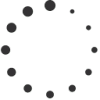
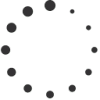
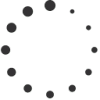
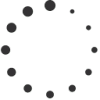

In [ ]:
drug_detail_data = []

for i, row in drug_code_df.iterrows():
    data = get_drug_detail_html(driver, row['code'])

    drug_detail_data.append(data)
    drug_code_df.loc[i, 'complete'] = True

In [61]:
drug_detail_html = pd.DataFrame(drug_detail_data)

In [63]:
drug_detail_html.to_csv(data_base_path + "drug_detail_html.csv", index=False)

## 약 세부 정보 정제

In [ ]:
drug_detail_html = pd.read_csv(data_base_path + "drug_detail_html.csv")

In [ ]:
def get_drug_detail(html):
    soup = BeautifulSoup(html, "html.parser")

    # 1. 제품명
    result_drug_name = soup.select_one("#result_drug_name")
    if result_drug_name:
        result_drug_name = result_drug_name.get_text(strip=True)

    # 2. 성분/함량 (li > a)
    ingr_mg = [a.get_text(strip=True) for a in soup.select("#ingr_mg li a")]

    # 3. 첨가물
    additives_raw = soup.select_one("#additives").get_text("\n", strip=True)
    additives = [a.strip('" ') for a in additives_raw.split("\n") if a.strip()]

    # 4. 제형
    drug_form = soup.select_one("#drug_form")
    if drug_form:
        drug_form = drug_form.get_text(strip=True)

    # 5. 성상
    charact = soup.select_one("#charact")
    if charact:
        charact = charact.get_text(strip=True)

    # 6. KPIC/ATC 코드 (li > a)
    kpic_atc = [a.get_text(strip=True) for a in soup.select("#kpic_atc li a")]

    # 7. 전문/일반 구분
    stmt = soup.select_one("#stmt")
    if stmt:
        stmt = stmt.get_text(strip=True)

    # 8. 효능
    effect = soup.select_one("#effect")
    if effect:
        effect = effect.get_text(" ", strip=True)

    # 9. 용법/용량
    dosage = soup.select_one("#dosage")
    if dosage:
        dosage = dosage.get_text(" ", strip=True)

    # 10. 주의사항
    caution = soup.select_one("#caution")
    if caution:
        caution = caution.get_text(" ", strip=True)

    result = {
        "제품명": result_drug_name,
        "성분/함량": ingr_mg,
        "첨가물": additives,
        "제형": drug_form,
        "성상": charact,
        "KPIC/ATC": kpic_atc,
        "구분": stmt,
        "효능": effect,
        "용법": dosage,
        "주의사항": caution,
    }
    
    return result


In [ ]:
detail_data = []
for i, row in drug_detail_html.iterrows():
    detail_data.append(get_drug_detail(row['detail_html']))

In [ ]:
result_drug_df = pd.DataFrame(detail_data)
result_drug_df.to_csv(data_base_path + "result_drug_detail.csv")